### Importing python libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import pandas as pd

### Sigmoid function

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Parameters initialization

In [3]:
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))
    
    parameters = {"W1": W1, "b1":b1,
                 "W2": W2, "b2":b2}
    
    return parameters

### Forward propagation

In [4]:
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1- Y))
    cost = -1/m * np.sum(logprobs)
    return cost, cache, A2
    

### Backward propagation

We divide by `m` for <b>m</b> examples

In [5]:
def backwarPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1*(1-A1))
    dW1 = np.dot(dZ1, X.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m
    
    gradients = {"dZ2":dZ2, "dW2":dW2, "db2":db2,
                "dZ1":dZ1, "dW1":dW1, "db1":db1}
    
    return gradients
    

### Updating parameters

In [6]:
def updateParameters(parameters, gradients, alpha):
    parameters["W1"] = parameters["W1"] - alpha * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - alpha * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - alpha * gradients["db1"]
    parameters["b2"] = parameters["b2"] - alpha * gradients["db2"]
    return parameters

### Model to learn the XOR gate

In [7]:
X = np.array([[0, 0, 1, 1],
             [0, 1, 0, 1]])

Y = np.array([[0, 1, 1, 0]])

### Training model with Model parameters

In [8]:
nueronsInHiddenLayers = 4
inputFeatures = X.shape[0]
outputFeatures = Y.shape[0]
parameters = initializeParameters(inputFeatures, nueronsInHiddenLayers, outputFeatures)
epoch = 10000
alpha = 0.01 #learning rate
losses = np.zeros((epoch, 1))

In [18]:
def train(X, Y):
    nueronsInHiddenLayers = 4
    inputFeatures = X.shape[0]
    outputFeatures = Y.shape[0]
    parameters = initializeParameters(inputFeatures, nueronsInHiddenLayers, outputFeatures)
    epoch = 1000000
    alpha = 0.01 #learning rate
    losses = np.zeros((epoch, 1))
    for i in range(epoch):
        losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
        gradients = backwarPropagation(X, Y, cache)
        parameters = updateParameters(parameters, gradients, alpha)

In [10]:
X = np.array([[0, 0, 1, 1],
             [0, 1, 0, 1]])

Y = np.array([[0, 1, 1, 0]])

model = train(X, Y)
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

### Evaluating performance

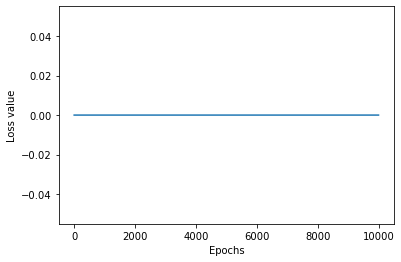

In [19]:
plt.figure()
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss value")
plt.show()

### Testing

In [20]:
X = np.array([[0, 0, 1, 1], 
              [0, 1, 1, 0]])
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
print(prediction)

[[1. 0. 1. 1.]]


In [13]:
df = pd.DataFrame({'var_1':['a','b','c'], 'var_2':[1, 2, 3], 'var_3':['apple', 'banana', 'pear']})
cols = ['var_1', 'var_2']    # Set columns to combine
df['combined'] = df[cols].apply(lambda row: ', '.join(row.values.astype(str)), axis=1)

# Define which column is index
df_i = df.set_index('combined') 

# Set the index to None
df_i.index.names = [None] 

In [14]:
df_i

,var_1,var_2,var_3
"a, 1",a,1,apple
"b, 2",b,2,banana
"c, 3",c,3,pear


In [15]:
data = {'X':[[0, 0],[0, 1], [1, 0], [1, 1]],
                'Y':[0, 1, 1, 0]}
df = pd.DataFrame(data)
df

,X,Y
0,"[0, 0]",0
1,"[0, 1]",1
2,"[1, 0]",1
3,"[1, 1]",0
